# Machine Learning: Generalization, Model Selection and Beyond Linearity

# Instructions

This study explores model selection using K-fold cross validation and methods for selecting hyperparameters to enhance model generalizability.

The analysis is structured into three parts:

1. **Part One**: Generalization
2. **Part Two**: Model Selection
3. **Part Three**: Beyond Linearity

To ensure you understand how each package is used, libraries will be imported as and when needed. The libraries used are all open source, and if you do not have any of these libraries installed, you can install them using the `pip install` method, either via your terminal or within a code cell in this notebook. For example, in your code cell you can use:

`!pip install matplotlib`

# Part One: Generalization 


We will make use of the "make classification" from sklearn datasets

In [169]:
import warnings
warnings.filterwarnings('ignore')

### Make Classification Datasets and Plot

In [170]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_circles
X, y = make_circles(n_samples=1000,factor=.25, noise=.30)

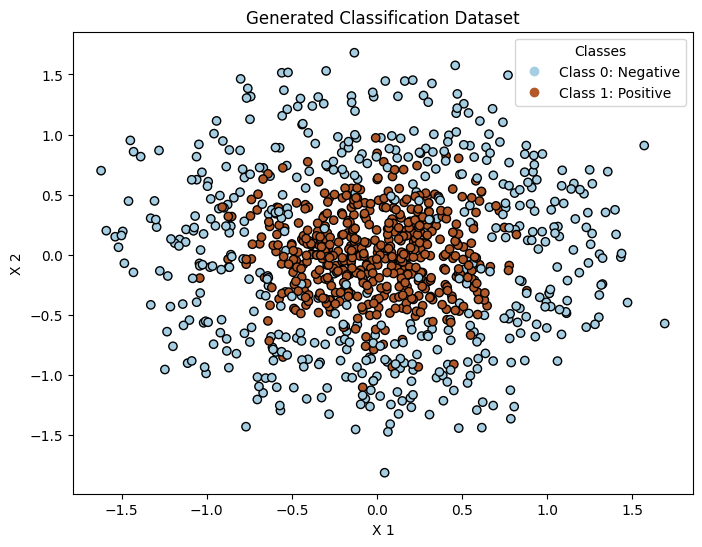

In [171]:
def plot_dataset(X, y, title="Dataset"):
    """
    Plots the dataset with different colors for each class and adds a legend.
    
    Parameters:
    X (array-like): Feature matrix.
    y (array-like): Target vector.
    title (str): Title of the plot.
    """
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
    plt.title(title)
    plt.xlabel("X 1")
    plt.ylabel("X 2")
    
    # Create a legend
    handles, labels = scatter.legend_elements()
    legend_labels = ['Class 0: Negative', 'Class 1: Positive']
    plt.legend(handles, legend_labels, title="Classes")
    
    plt.show()
plot_dataset(X, y, title="Generated Classification Dataset")

### Kfold Cross validation:



The kfold cross-validation metric is calculated as:

$$
CV_k = \frac{1}{k} \sum_{i=1}^{k} \text{Metric}_i
$$

The metrics we would use will be accuracy and the f1 score. We will use the inbuilt libraries for these metrics directly from sklearn.



In [172]:
import numpy as np
from sklearn.metrics import accuracy_score, f1_score

def kfold_cross_validation(model, X, y, k=5, random_seed=0):
    """
    K-Fold cross-validation for a selected model.

    Parameters:
    model: The model you want to evaluate.
    X: The input features (numpy array or pandas DataFrame).
    y: The target variable (numpy array or pandas Series).
    k: Number of folds (default is 5).

    Returns: 
    Average metrics across the K folds.
    """
    np.random.seed(random_seed)
    n_samples = len(X)
    # Get the fold size by dividing the number of samples by k
    fold_size = n_samples // k Ensure integer division
    
    indices = np.arange(n_samples)
    np.random.shuffle(indices)  # Shuffle indices for random sampling

    # Initialize lists to store accuracies and f1_scores
    accuracies = [] Accuracy list
    f1_scores =[] F1 score list

    for i in range(k):
        # Select the test and train indices
        test_indices =  indices[i * fold_size : (i + 1) * fold_size] Define test indices
        train_indices = np.concatenate([indices[:i * fold_size], indices[(i + 1) * fold_size:]]) Define train indices

        X_train, X_test = X[train_indices], X[test_indices]
        y_train, y_test = y[train_indices], y[test_indices] Model fitting on train Use model to make Predictions on held out xtest
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred) Calculate accuracy and append to accuracies list
        f1 =  f1_score(y_test, y_pred, average='weighted') Calculate weighted F1 score and append to f1_scores list
        accuracies.append(accuracy)
        f1_scores.append(f1)

    return np.mean(accuracies),np.mean(f1_scores) Return average accuracy and F1 score
   
    